In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from rlhfutils.rl_utils import get_synth_rewards
from tqdm import tqdm
from datasets import Dataset, concatenate_datasets

/u/prasanns/miniconda3/envs/rlhfenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2024-03-11 10:33:55,387] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/u/prasanns/miniconda3/envs/rlhfenv/lib/python3.10/site-packages/trl/trainer/ppo_config.py:142: UserWarning: The `optimize_cuda_cache` argument will be deprecated soon, please use `optimize_device_cache` instead.
  warnings.warn(


In [2]:
%load_ext autoreload
%autoreload 2

In [150]:
ds = Dataset.load_from_disk("../../../active-rlhf/outputs/data/contrastivedistill/wikionpolicyprompts//")

In [151]:
len(concatenate_datasets([ds]*10))

847570

In [27]:
tmp = pd.read_json("../../../active-rlhf/outputs/results/rollouts//ultra/ppo_ultragolddpoplusfinal2.jsonl", orient='records', lines=True)

In [31]:
# tlog = pd.read_json("../../outputs/bagofwords/dynarmlogs/expbow50_updatereprod_fix.jsonl", orient='records', lines=True)
# tlog = pd.read_json("../../../active-rlhf/outputs/results/dynarmlogs/bagofwords/expbow50_reprodtest_exact.jsonl", orient='records', lines=True)
tlog = pd.read_json("../../../active-rlhf/outputs/results/dynarmlogs/ultra/tiny_rm_conf_active_final.jsonl", orient='records', lines=True)
tmp = tlog
tmp = tmp.dropna(subset='golds')

In [32]:
tmp

,texts,rewards,golds,labelled,step,reuses
0,[Question: Find a student-led cybersecurity or...,"[1.703125, 2.28125]",[],0.0,1,NaN
1,[Question: Can you explain the significance of...,"[3.890625, 1.78125]",[],0.0,1,NaN
2,[Question: Can you describe the process of imp...,"[1.8046875, 2.0625]","[4.5, 4.0]",0.0,1,NaN
3,[Question: Can you provide examples of how Bee...,"[1.7734375, -1.0]",[],1.0,1,NaN
4,[Question: Can you describe the impact of impl...,"[3.03125, 6.25]",[],1.0,1,NaN
...,...,...,...,...,...,...
3409,"[Question: Based on the information provided, ...","[39.5, 38.0]",[],392.0,196,NaN
3410,[Question: What types of events other than hoc...,"[28.5, 36.75]",[],392.0,196,NaN
3411,[Question: Please write a 500-word blog post o...,"[24.375, 26.75]",[],392.0,196,NaN
3412,[Question: How do the beliefs of Buddhism and ...,"[23.75, 13.8125]",[],392.0,196,NaN


In [33]:
rat = 0
ngs = []
accs = []
sind = 0
for ind, row in tmp.iloc[sind:].iterrows():
    # row['golds'] = get_synth_rewards(row['texts'], 'bagofwords')
    if len(row['golds'])==0:
        continue
    if row['golds'][0]==row['golds'][1]:
            continue
    ngs.append(row['golds'])
    if ((row['rewards'][0]>row['rewards'][1])!=(row['golds'][0]>row['golds'][1])):
        rat+=1
        accs.append(1)
    else:
        accs.append(0)
#tmp['golds'] = ngs
print(rat/len(ngs))

0.4875


In [34]:
tot, corr = 0, 0
vals = []
interv = 25
for j in range(0, len(accs), interv):
    vals.append(mean(accs[j:j+50]))
    # # check heuristic accuracy
    # for i, row in tmp.iloc[j:j+interv].iterrows():
    #     # if abs(row['rewards'][0]-row['rewards'][1])>row['thresh']:
    #     if row['golds'][0]==row['golds'][1]:
    #         continue
    #     tot = tot+1
    #     corr += 1 if ((row['rewards'][0]>row['rewards'][1])==(row['golds'][0]>row['golds'][1])) else 0
    # vals.append(corr/tot)

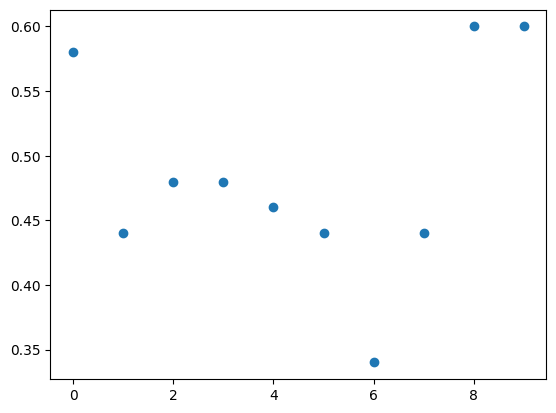

In [35]:
plt.scatter(range(len(vals)), vals)

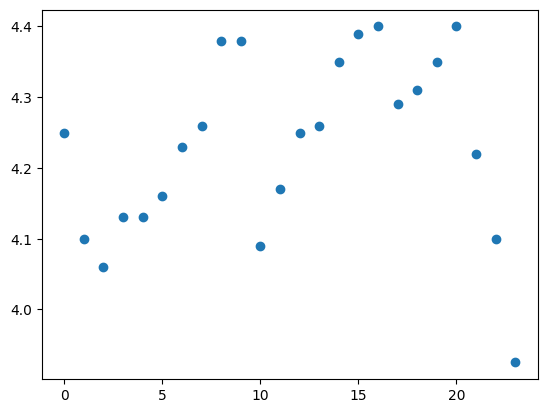

In [38]:
means = [mean(m) for m in ngs]
# means = [mean(m) for m in tmp['rewards']]

interv = 10
mbins = [mean(means[i:i+25]) for i in range(0, len(means), interv)]
plt.scatter(range(len(mbins)), mbins)

In [171]:
mean(means[-200:])

12.2

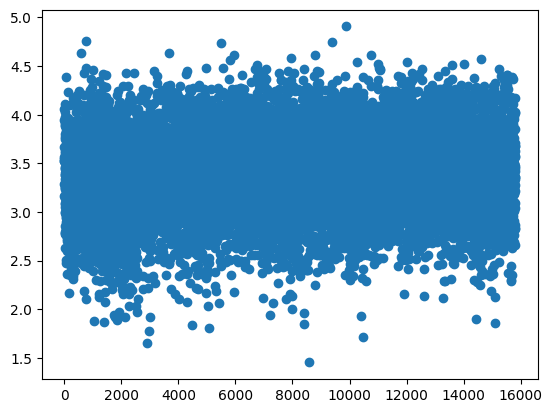

In [136]:
means = [mean(m) for m in tmp['golds']]
plt.scatter(range(len(means)), means)